![example](images/director_shot.jpeg)

# Movie Analysis

**Authors:** Dan Lee
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Question 1: What movie genres earn the most worldwide revenue?
We will explore the data to find the top five highest grossing movie genres from 2010-2018.

### Q1 A. Data Understanding

We will be using two datasets:

1. imdb.title.basics - This dataset comes from IMDB. The target variable we will use is the genre types of each movie.
2. bom.movie.gross - This dataset comes from BOM. The target variables are domestic (USA) gross and foreign gross.

All of the datasets in this analysis contain comprhensive movie data from the years 2010-2018.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [3]:
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


### Q1 B. Data Preperation
In this section we will prepare to join these two datasets by:
* Creating a title + year column to merge on
* Cleaning the data from duplicates and null values

In [4]:
# Normalizing title names in preparation for join
imdb_adjusted_titles = []
for title in imdb_title_basics['primary_title']:
    imdb_adjusted_titles.append(title.lower().replace(":", "").replace("-", ""))
imdb_title_basics['primary_title'] = imdb_adjusted_titles
imdb_title_basics['primary_title'].head()

0                          sunghursh
1    one day before the rainy season
2         the other side of the wind
3                    sabse bada sukh
4           the wandering soap opera
Name: primary_title, dtype: object

In [5]:
# Create new column with title + year to minimize duplicates when joining
imdb_title_basics['title_year'] = imdb_title_basics['primary_title'] + " " + imdb_title_basics['start_year'].astype('str')
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_year
0,tt0063540,sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",sunghursh 2013
1,tt0066787,one day before the rainy season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",one day before the rainy season 2019
2,tt0069049,the other side of the wind,The Other Side of the Wind,2018,122.0,Drama,the other side of the wind 2018
3,tt0069204,sabse bada sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",sabse bada sukh 2018
4,tt0100275,the wandering soap opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",the wandering soap opera 2017


In [6]:
imdb_title_basics[imdb_title_basics['start_year'] == 2019].head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_year
1,tt0066787,one day before the rainy season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",one day before the rainy season 2019
26,tt0263814,on kadin,On kadin,2019,NaN,Drama,on kadin 2019
31,tt0285423,abolição,Abolição,2019,NaN,Documentary,abolição 2019
68,tt0385887,motherless brooklyn,Motherless Brooklyn,2019,NaN,"Crime,Drama",motherless brooklyn 2019
107,tt0437086,alita battle angel,Alita: Battle Angel,2019,122.0,"Action,Adventure,Sci-Fi",alita battle angel 2019


This data was likely gathered in 2019 as there are some movies from 2019 with null values for runtime minutes. Thus, we will remove these unreleased movies from the dataset:

In [7]:
# Purging unreleased movies based on year and null runtime
imdb_drop_rows = []
for row in imdb_title_basics.index:
    if (np.isnan(imdb_title_basics['runtime_minutes'][row]) == True) and (imdb_title_basics['start_year'][row] >= 2020):
        imdb_drop_rows.append(row)
imdb_drop_rows[:5]  

[33, 93, 229, 289, 386]

In [8]:
imdb_title_basics.drop(imdb_drop_rows, inplace = True)

In [9]:
len(imdb_title_basics)

145170

In [10]:
# Checking title_year column for duplicates
imdb_title_basics.duplicated(subset=['title_year']).sum()

2160

In [11]:
# Checking original title column for duplicates
imdb_title_basics.duplicated(subset=['primary_title']).sum()

10251

In [12]:
# Dropping duplicate titles in title_year column
clean_imdb = imdb_title_basics.drop_duplicates(subset=['title_year'], keep="first")
clean_imdb.duplicated(subset=['title_year']).sum()

0

In [13]:
len(clean_imdb)

143010

Let's apply the same process to the BOM dataset:

In [14]:
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [15]:
# Normalizing title names in preparation for join
bom_adjusted_titles = []
for title in bom_movie_gross['title']:
    bom_adjusted_titles.append(title.lower().replace(":", "").replace("-", ""))
bom_movie_gross['title'] = bom_adjusted_titles
bom_movie_gross['title'].head()

0                                    toy story 3
1                     alice in wonderland (2010)
2    harry potter and the deathly hallows part 1
3                                      inception
4                            shrek forever after
Name: title, dtype: object

In [16]:
# Create new column with title + year to minimize duplicates when joining
bom_movie_gross['title_year'] = bom_movie_gross['title'] + " " + bom_movie_gross['year'].astype('str')
bom_movie_gross = bom_movie_gross.reset_index()
bom_movie_gross.head()

,index,title,studio,domestic_gross,foreign_gross,year,title_year
0,0,toy story 3,BV,415000000.0,652000000,2010,toy story 3 2010
1,1,alice in wonderland (2010),BV,334200000.0,691300000,2010,alice in wonderland (2010) 2010
2,2,harry potter and the deathly hallows part 1,WB,296000000.0,664300000,2010,harry potter and the deathly hallows part 1 2010
3,3,inception,WB,292600000.0,535700000,2010,inception 2010
4,4,shrek forever after,P/DW,238700000.0,513900000,2010,shrek forever after 2010


In [17]:
# Checking original title column for duplicates
bom_movie_gross.duplicated(subset=['title']).sum()

1

In [18]:
# Checking new title_year column for duplicates
bom_movie_gross.duplicated(subset=['title_year']).sum()

0

In [19]:
# Joining imdb with bom
len(bom_movie_gross)

3387

In [20]:
len(clean_imdb)

143010

In [21]:
bom_imdb = pd.merge(
    clean_imdb,
    bom_movie_gross,
    how='inner',
    on ='title_year')

In [22]:
bom_imdb

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_year,index,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,wazir,Wazir,2016,103.0,"Action,Crime,Drama",wazir 2016,2568,wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,on the road,On the Road,2012,124.0,"Adventure,Drama,Romance",on the road 2012,904,on the road,IFC,744000.0,8000000,2012
2,tt0359950,the secret life of walter mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",the secret life of walter mitty 2013,1169,the secret life of walter mitty,Fox,58200000.0,129900000,2013
3,tt0365907,a walk among the tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",a walk among the tombstones 2014,1577,a walk among the tombstones,Uni.,26300000.0,26900000,2014
4,tt0369610,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",jurassic world 2015,1873,jurassic world,Uni.,652300000.0,"1,019.4",2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,tt8362680,mountain,Mountain,2018,15.0,Documentary,mountain 2018,3308,mountain,Greenwich,365000.0,NaN,2018
1919,tt8404272,how long will i love u,Chao shi kong tong ju,2018,101.0,Romance,how long will i love u 2018,3149,how long will i love u,WGUSA,747000.0,82100000,2018
1920,tt8427036,helicopter eela,Helicopter Eela,2018,135.0,Drama,helicopter eela 2018,3354,helicopter eela,Eros,72000.0,NaN,2018
1921,tt9078374,last letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",last letter 2018,3319,last letter,CL,181000.0,NaN,2018


In [23]:
# Checking merged dataset for duplicates
bom_imdb.duplicated(subset=['index']).sum()

0

In [24]:
bom_imdb.duplicated(subset=['tconst']).sum()

0

In [25]:
# Checking for null values
bom_imdb.isna().sum()

tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes      3
genres               0
title_year           0
index                0
title                0
studio               2
domestic_gross      11
foreign_gross      609
year                 0
dtype: int64

The null values in the domestic_gross and foreign_gross columns must be dealt with if we are going to find total revenue for currently released movies. We will take a closer look at runtime_minutes in Q2.

In [26]:
bom_imdb[bom_imdb['domestic_gross'].isna()]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_year,index,title,studio,domestic_gross,foreign_gross,year
314,tt1319716,it's a wonderful afterlife,It's a Wonderful Afterlife,2010,100.0,"Comedy,Drama,Fantasy",it's a wonderful afterlife 2010,230,it's a wonderful afterlife,UTV,NaN,1300000,2010
475,tt1507563,dark tide,Dark Tide,2012,94.0,"Action,Adventure,Drama",dark tide 2012,1017,dark tide,WHE,NaN,432000,2012
524,tt1570982,celine through the eyes of the world,Celine: Through the Eyes of the World,2010,120.0,"Documentary,Music",celine through the eyes of the world 2010,298,celine through the eyes of the world,Sony,NaN,119000,2010
584,tt1618421,white lion,White Lion,2010,88.0,"Drama,Family",white lion 2010,302,white lion,Scre.,NaN,99600,2010
638,tt1658837,the tall man,The Tall Man,2012,106.0,"Crime,Drama,Horror",the tall man 2012,928,the tall man,Imag.,NaN,5200000,2012
867,tt1992138,force,Force,2011,137.0,"Action,Thriller",force 2011,537,force,FoxS,NaN,4800000,2011
931,tt2106537,matru ki bijlee ka mandola,Matru ki Bijlee ka Mandola,2013,151.0,"Comedy,Drama",matru ki bijlee ka mandola 2013,1308,matru ki bijlee ka mandola,FIP,NaN,6000000,2013
960,tt2147365,keith lemon the film,Keith Lemon: The Film,2012,85.0,Comedy,keith lemon the film 2012,933,keith lemon the film,NaN,NaN,4000000,2012
1039,tt2300975,jessabelle,Jessabelle,2014,90.0,"Horror,Thriller",jessabelle 2014,1659,jessabelle,LGF,NaN,7000000,2014
1179,tt2597892,viral,Viral,2016,85.0,"Drama,Horror,Sci-Fi",viral 2016,2595,viral,W/Dim.,NaN,552000,2016


In [27]:
# Dropping rows with no domestic gross data because there are only 11, and their foreign
# gross impact is relatively tiny
bom_imdb = bom_imdb.dropna(subset = ['domestic_gross'])

In [28]:
bom_imdb['foreign_gross'][0] == True # Should return false it is a null value

False

#### Cleaning runtime data ahead of question 2
This section includes cleaning null values for runtime data, and must be adjusted now before we proceed.

In [29]:
# Checking for runtime null values
bom_imdb.isna().sum()

tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes      3
genres               0
title_year           0
index                0
title                0
studio               0
domestic_gross       0
foreign_gross      609
year                 0
dtype: int64

In [30]:
# Checking domestic gross for movies with no runtime data
titles_null_runtime = {}
for row in bom_imdb.index:
    if pd.isna(bom_imdb['runtime_minutes'][row]) == True:
        titles_null_runtime[bom_imdb['title_year'][row]] = bom_imdb['domestic_gross'][row]
titles_null_runtime

{'upside down 2013': 105000.0,
 'extraction 2015': 16800.0,
 'the other side 2016': 8100.0}

We will replace the null runtime for the movies with the median runtime for all movies:

In [31]:
# Replacing null runtime values with median
runtime_mean = bom_imdb['runtime_minutes'].mean()
runtime_median = bom_imdb['runtime_minutes'].median()

Mean: 110.82818229439498
Median: 107.0


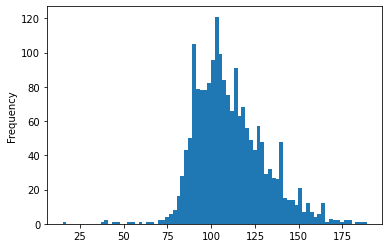

In [32]:
# Plotting distribution of runtime
bom_imdb['runtime_minutes'].plot(kind='hist', bins=80)
print(f"Mean: {bom_imdb['runtime_minutes'].mean()}")
print(f"Median: {bom_imdb['runtime_minutes'].median()}")

In [33]:
bom_imdb['runtime_minutes'] = bom_imdb['runtime_minutes'].fillna(runtime_median)


<ipython-input-33-4655749cc4d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_imdb['runtime_minutes'] = bom_imdb['runtime_minutes'].fillna(runtime_median)


In [34]:
bom_imdb.isna().sum()

tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
title_year           0
index                0
title                0
studio               0
domestic_gross       0
foreign_gross      609
year                 0
dtype: int64

####  Q1 Data Preparation (cont.) - Foreign gross missing data
In order to decide what to do with the foreign_gross null data, we will analyze what movies are missing foreign gross revenue by looking at how much they earned domestically:

In [35]:
# Preparing a dictionary to view domestic gross of movies missing foreign gross data
titles_null_foreign = {}
for row in bom_imdb.index:
    if pd.isna(bom_imdb['foreign_gross'][row]) == True:
        titles_null_foreign[bom_imdb['title_year'][row]] = bom_imdb['domestic_gross'][row]
    

In [36]:
# Finding domestic gross mean as a benchmark
bom_imdb['domestic_gross'].mean()

42926502.922594145

In [37]:
# Viewing starting from the highest earnings
null_foreign_earnings = {k: v for k, v in sorted(titles_null_foreign.items(), key=lambda item: item[1], reverse=True)}
null_foreign_earnings

{'book club 2018': 68600000.0,
 'war room 2015': 67800000.0,
 'all eyez on me 2017': 44900000.0,
 '47 meters down 2017': 44300000.0,
 'snitch 2013': 42900000.0,
 'courageous 2011': 34500000.0,
 'wind river 2017': 33800000.0,
 'when the game stands tall 2014': 30100000.0,
 'hostiles 2017': 29800000.0,
 'home again 2017': 27000000.0,
 'winchester 2018': 25100000.0,
 'our idiot brother 2011': 24800000.0,
 'whiskey tango foxtrot 2016': 23100000.0,
 'keanu 2016': 20600000.0,
 'broken city 2013': 19700000.0,
 'the choice 2016': 18700000.0,
 'admission 2013': 18000000.0,
 'they shall not grow old 2018': 18000000.0,
 'bad santa 2 2016': 17800000.0,
 'free solo 2018': 17500000.0,
 'addicted 2014': 17400000.0,
 'norm of the north 2016': 17100000.0,
 'detroit 2017': 16800000.0,
 'hunter killer 2018': 15800000.0,
 'the infiltrator 2016': 15400000.0,
 'the last exorcism part ii 2013': 15200000.0,
 'woodlawn 2015': 14400000.0,
 'wish upon 2017': 14300000.0,
 'jackie 2016': 14000000.0,
 'love & frien

In [38]:
len(null_foreign_earnings)

609

Only 5 of 609 movies with missing foreign gross data earned above or near the average domestic gross of $43 million. Since these movies generally have lower impact on the dataset's revenue, we will replace the null values with 0 rather than median or mean: 

In [39]:
# Assigning foreign gross null values to $0
bom_imdb['foreign_gross'] = bom_imdb['foreign_gross'].fillna('0')

<ipython-input-39-b491f3028515>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_imdb['foreign_gross'] = bom_imdb['foreign_gross'].fillna('0')


In [40]:
bom_imdb.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
title_year          object
index                int64
title               object
studio              object
domestic_gross     float64
foreign_gross       object
year                 int64
dtype: object

In [41]:
# Cleaning foreign_gross so it can be translated from type string to float
foreign_adjusted = []
for gross in bom_imdb['foreign_gross']:
    foreign_adjusted.append(gross.replace(",", ""))
bom_imdb['foreign_gross'] = foreign_adjusted

<ipython-input-41-3874b9b0c9be>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_imdb['foreign_gross'] = foreign_adjusted


In [42]:
bom_imdb['foreign_gross'] = bom_imdb['foreign_gross'].astype('float64')

<ipython-input-42-125bfd2a1a68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_imdb['foreign_gross'] = bom_imdb['foreign_gross'].astype('float64')


In [43]:
bom_imdb.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
title_year          object
index                int64
title               object
studio              object
domestic_gross     float64
foreign_gross      float64
year                 int64
dtype: object

Now let's create a new column combining total revenue by adding domestic and foreign gross together:

In [44]:
total_gross = []
for row in bom_imdb.index:
    total_gross.append(bom_imdb['domestic_gross'][row] + bom_imdb['foreign_gross'][row])
bom_imdb['total_gross'] = total_gross
bom_imdb['total_gross']

<ipython-input-44-79b1ebfcbf9e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_imdb['total_gross'] = total_gross


0         1100000.0
1         8744000.0
2       188100000.0
3        53200000.0
4       652301019.4
           ...     
1918       365000.0
1919     82847000.0
1920        72000.0
1921       181000.0
1922     20300000.0
Name: total_gross, Length: 1912, dtype: float64

In [45]:
bom_imdb['total_gross'].isna().sum()

0

#### Parsing Out Genre Information
In order to analyze this movie data by genre, we must create new columns indicating if a movie falls into any or multiple genres. Firstly we will find a unique list of genres:

In [46]:
# Retrieving unique genres list
unique_genres_list = []
for genre_details in bom_imdb['genres']:
    genres_list = genre_details.split(",")
    for genre in genres_list:
        unique_genres_list.append(genre)

unique_genres_list = sorted(list(set(unique_genres_list)))
unique_genres_list

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [118]:
# Creating and populating a column for each genre
for genre in unique_genres_list:
    bom_imdb[genre] = bom_imdb['genres'].apply(lambda x: genre in x).astype('int')
bom_imdb.head()

<ipython-input-118-a5bfcfed0cf9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_imdb[genre] = bom_imdb['genres'].apply(lambda x: genre in x).astype('int')


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_year,index,title,studio,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0315642,wazir,Wazir,2016,100.0,"Action,Crime,Drama",wazir 2016,2568,wazir,Relbig.,...,0,0,0,0,0,0,0,0,0,0
1,tt0337692,on the road,On the Road,2012,120.0,"Adventure,Drama,Romance",on the road 2012,904,on the road,IFC,...,0,0,0,0,1,0,0,0,0,0
2,tt0359950,the secret life of walter mitty,The Secret Life of Walter Mitty,2013,110.0,"Adventure,Comedy,Drama",the secret life of walter mitty 2013,1169,the secret life of walter mitty,Fox,...,0,0,0,0,0,0,0,0,0,0
3,tt0365907,a walk among the tombstones,A Walk Among the Tombstones,2014,110.0,"Action,Crime,Drama",a walk among the tombstones 2014,1577,a walk among the tombstones,Uni.,...,0,0,0,0,0,0,0,0,0,0
4,tt0369610,jurassic world,Jurassic World,2015,120.0,"Action,Adventure,Sci-Fi",jurassic world 2015,1873,jurassic world,Uni.,...,0,0,0,0,0,1,0,0,0,0


In [48]:
bom_imdb.sort_values(by=['total_gross'], ascending = False).head(50)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_year,index,title,studio,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
1111,tt2395427,avengers age of ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",avengers age of ultron 2015,1875,avengers age of ultron,BV,...,0,0,0,0,0,1,0,0,0,0
761,tt1825683,black panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",black panther 2018,3080,black panther,BV,...,0,0,0,0,0,1,0,0,0,0
212,tt1201607,harry potter and the deathly hallows part 2,Harry Potter and the Deathly Hallows: Part 2,2011,130.0,"Adventure,Drama,Fantasy",harry potter and the deathly hallows part 2 2011,328,harry potter and the deathly hallows part 2,WB,...,0,0,0,0,0,0,0,0,0,0
1157,tt2527336,star wars the last jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",star wars the last jedi 2017,2758,star wars the last jedi,BV,...,0,0,0,0,0,0,0,0,0,0
1634,tt4881806,jurassic world fallen kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",jurassic world fallen kingdom 2018,3081,jurassic world fallen kingdom,Uni.,...,0,0,0,0,0,1,0,0,0,0
1036,tt2294629,frozen,Frozen,2013,102.0,"Adventure,Animation,Comedy",frozen 2013,1127,frozen,BV,...,0,0,0,0,0,0,0,0,0,0
1397,tt3606756,incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",incredibles 2 2018,3082,incredibles 2,BV,...,0,0,0,0,0,0,0,0,0,0
299,tt1300854,iron man 3,Iron Man Three,2013,130.0,"Action,Adventure,Sci-Fi",iron man 3 2013,1128,iron man 3,BV,...,0,0,0,0,0,1,0,0,0,0
1034,tt2293640,minions,Minions,2015,91.0,"Adventure,Animation,Comedy",minions 2015,1876,minions,Uni.,...,0,0,0,0,0,0,0,0,0,0
1371,tt3498820,captain america civil war,Captain America: Civil War,2016,147.0,"Action,Adventure,Sci-Fi",captain america civil war 2016,2322,captain america civil war,BV,...,0,0,0,0,0,1,0,0,0,0


In [49]:
# Viewing mean total gross by genre
mean_total_gross = []
for genre in unique_genres_list:
    genre_gross = bom_imdb.loc[bom_imdb[genre] == 1]['total_gross'].mean()
    mean_total_gross.append((genre, genre_gross))
mean_total_gross

[('Action', 190190685.60348624),
 ('Adventure', 320389676.60716176),
 ('Animation', 314138988.5934959),
 ('Biography', 58189028.70769231),
 ('Comedy', 107011699.4011713),
 ('Crime', 62274617.34909091),
 ('Documentary', 10447066.657407407),
 ('Drama', 55344769.441955194),
 ('Family', 154735784.07954547),
 ('Fantasy', 223227357.56060606),
 ('History', 57728077.0),
 ('Horror', 78360422.5165563),
 ('Music', 61411912.16216216),
 ('Musical', 84580666.66666667),
 ('Mystery', 88703551.07194245),
 ('News', 13200.0),
 ('Romance', 43765660.18446602),
 ('Sci-Fi', 339625634.71339285),
 ('Sport', 43154185.71428572),
 ('Thriller', 105161419.42123288),
 ('War', 31476324.0),
 ('Western', 90589508.33333333)]

### Q1. Data Modeling

#### Plotting the Top 5 Genres

Microsoft is worldwide brand and and a household company name. With their name recognition and resources, Microsoft can and should aim to make a splash by making movies in the top 5 revenue earning genres.

In this section we will:
* Identify the top 5 genres by total revenue
* Plot each genre's mean revenue per year from 2010-2018 to analyze trends

In [50]:
# Finding top 5 genres by mean total gross
def sort_tuple(tup): 
    return(sorted(tup, key = lambda x: x[1], reverse=True))

In [51]:
top_5_mean_total_gross = sort_tuple(mean_total_gross)[:5]
top_5_mean_total_gross

[('Sci-Fi', 339625634.71339285),
 ('Adventure', 320389676.60716176),
 ('Animation', 314138988.5934959),
 ('Fantasy', 223227357.56060606),
 ('Action', 190190685.60348624)]

Analyzing the data: From 2010-2018, on average a movie released under the Sci-Fi genre would have earned $339,625,635.
***
Next, let's plot the average to see how Sci-Fi films performed in each year:

In [119]:
# Preparing a dataframe(sci-fi) for plotting
scifi_drop_rows = []
for row in bom_imdb.index:
    if bom_imdb['Sci-Fi'][row] == 0:
        scifi_drop_rows.append(row)
scifi_drop_rows[:5] # Delete all non science fiction movies

[0, 1, 2, 3, 5]

In [120]:
scifi_plot = bom_imdb.drop(scifi_drop_rows)
print(len(scifi_plot))

112


In [54]:
# Finding Sci-Fi average revenue per year
scifi_plot.groupby(['year'])['total_gross'].mean()

year
2010    2.178546e+08
2011    2.312033e+08
2012    2.508202e+08
2013    3.933600e+08
2014    4.441169e+08
2015    2.823964e+08
2016    4.508778e+08
2017    3.770833e+08
2018    4.345847e+08
Name: total_gross, dtype: float64

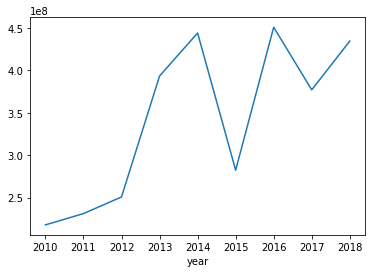

In [55]:
# Plotting Sci-Fi average revenue per year
scifi_plot.groupby(['year'])['total_gross'].mean().plot();

Looks like Sci-Fi films have been gradually performing better from 2010 to 2018! Let's look at the remaining 4 top genres:

In [56]:
# Define a function to plot genre by total revenue over time
def genre_gross_plot(genre, df):
    genre_drop_rows = []
    for row in df.index:
        if df[genre.capitalize()][row] == 0:
            genre_drop_rows.append(row)
            
    genre_plot = df.drop(genre_drop_rows)
    return genre_plot.groupby(['year'])['total_gross'].mean(), genre_plot.groupby(['year'])['total_gross'].mean().plot();

(year
 2010    3.131605e+08
 2011    2.908265e+08
 2012    3.144131e+08
 2013    3.210872e+08
 2014    3.543894e+08
 2015    2.888620e+08
 2016    3.199951e+08
 2017    3.386920e+08
 2018    3.416055e+08
 Name: total_gross, dtype: float64,
 <AxesSubplot:xlabel='year'>)

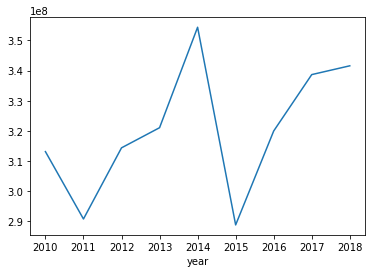

In [57]:
# Plotting Adventure average revenue per year
genre_gross_plot('adventure', bom_imdb)

(year
 2010    4.626000e+08
 2011    2.922837e+08
 2012    4.014222e+08
 2013    4.335668e+08
 2014    2.524545e+08
 2015    2.260832e+08
 2016    3.535400e+08
 2017    2.516094e+08
 2018    2.699567e+08
 Name: total_gross, dtype: float64,
 <AxesSubplot:xlabel='year'>)

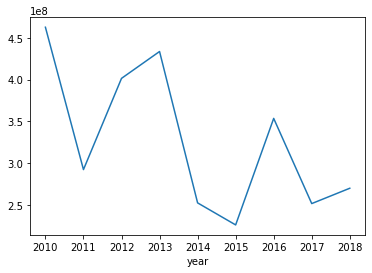

In [58]:
# Plotting Animation average revenue per year
genre_gross_plot('animation', bom_imdb)

(year
 2010    2.028074e+08
 2011    2.341724e+08
 2012    1.913293e+08
 2013    2.741364e+08
 2014    1.367720e+08
 2015    7.391667e+07
 2016    2.867496e+08
 2017    2.632766e+08
 2018    2.493849e+08
 Name: total_gross, dtype: float64,
 <AxesSubplot:xlabel='year'>)

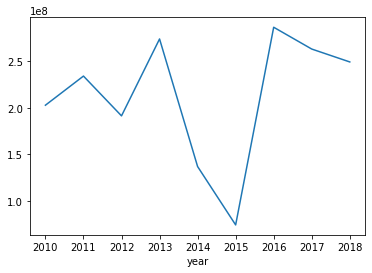

In [59]:
# Plotting Fantasy average revenue per year
genre_gross_plot('fantasy', bom_imdb)

(year
 2010    1.545023e+08
 2011    1.747712e+08
 2012    1.556103e+08
 2013    1.803327e+08
 2014    2.365366e+08
 2015    1.626865e+08
 2016    1.621667e+08
 2017    2.387588e+08
 2018    2.575156e+08
 Name: total_gross, dtype: float64,
 <AxesSubplot:xlabel='year'>)

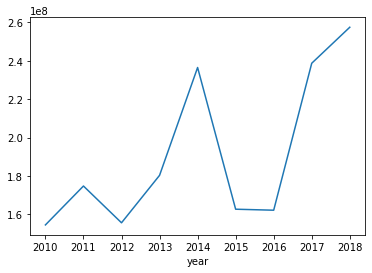

In [60]:
# Plotting Action average revenue per year
genre_gross_plot('action', bom_imdb)

Insert picture from non-tech presentation. See non-technical presentation for combined plot for top 5 genres

In [61]:
# Of the top 5 I would recommend sci-fi or adventure

### Q1 D. Data Evaluation
#### Interpreting the Results:
Of the top 5, the Sci-Fi genre seems to have the strongest upward momentum. The Adventure genre has also plateaud at a high level above almost every other genre. I would recommend Microsoft to explore making these types of movies and obtaining the intellectual property rights to sci-fi and adventure franchises (book series, video games, etc.).

## Question 2: How long should the movie be to maximize revenue?
In this section we will attempt to see if there are movie runtime "sweet spots" in each genre for movie makers to aim for.

***
### Q2 A. Data Understanding

We will be using the same datasets from the previous question:

1. imdb.title.basics - This dataset comes from IMDB. We will again use the genre information, and additionally will focus on movie runtime in minutes.
2. bom.movie.gross - This dataset comes from BOM. The target variables are domestic (USA) gross and foreign gross.



### Q2 B. Data Preparation
We have previously replaced missing runtime data with the median runtime for all movies during the data preparation section of Q1. Next we will create groups by runtime. This will be achieved by organizing groups into bin intervals of 5 minutes:

In [121]:
# Finding min/max of all movies' runtime minutes
bom_imdb['runtime_minutes'].min()

15.0

In [63]:
bom_imdb['runtime_minutes'].max()

189.0

In [123]:
# Dividing all movies into 5-minute invervals to make interpretation of resulting data a bit easier.
# This step makes the applicable data a tad less granular.
minutes = 15

while minutes <=185:
    bom_imdb.loc[(   bom_imdb['runtime_minutes'] >= minutes) 
                  & (bom_imdb['runtime_minutes'] < (minutes + 5)), 
                    'runtime_minutes'] = minutes
    minutes += 5


/Users/dan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/dan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/dan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [137]:
# # Breaking all runtime minutes into invervals of 5min
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 15) & (bom_imdb['runtime_minutes'] < 20), 'runtime_minutes'] = 15
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 20) & (bom_imdb['runtime_minutes'] < 25), 'runtime_minutes'] = 20
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 25) & (bom_imdb['runtime_minutes'] < 30), 'runtime_minutes'] = 25
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 30) & (bom_imdb['runtime_minutes'] < 35), 'runtime_minutes'] = 30
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 35) & (bom_imdb['runtime_minutes'] < 40), 'runtime_minutes'] = 35
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 40) & (bom_imdb['runtime_minutes'] < 45), 'runtime_minutes'] = 40
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 45) & (bom_imdb['runtime_minutes'] < 50), 'runtime_minutes'] = 45
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 50) & (bom_imdb['runtime_minutes'] < 55), 'runtime_minutes'] = 50
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 55) & (bom_imdb['runtime_minutes'] < 60), 'runtime_minutes'] = 55
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 60) & (bom_imdb['runtime_minutes'] < 65), 'runtime_minutes'] = 60
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 65) & (bom_imdb['runtime_minutes'] < 70), 'runtime_minutes'] = 65
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 70) & (bom_imdb['runtime_minutes'] < 75), 'runtime_minutes'] = 70
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 75) & (bom_imdb['runtime_minutes'] < 80), 'runtime_minutes'] = 75
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 80) & (bom_imdb['runtime_minutes'] < 85), 'runtime_minutes'] = 80
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 85) & (bom_imdb['runtime_minutes'] < 90), 'runtime_minutes'] = 85
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 90) & (bom_imdb['runtime_minutes'] < 95), 'runtime_minutes'] = 90
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 95) & (bom_imdb['runtime_minutes'] < 100), 'runtime_minutes'] = 95
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 100) & (bom_imdb['runtime_minutes'] < 105), 'runtime_minutes'] = 100
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 105) & (bom_imdb['runtime_minutes'] < 110), 'runtime_minutes'] = 105
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 110) & (bom_imdb['runtime_minutes'] < 115), 'runtime_minutes'] = 110
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 115) & (bom_imdb['runtime_minutes'] < 120), 'runtime_minutes'] = 115
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 120) & (bom_imdb['runtime_minutes'] < 125), 'runtime_minutes'] = 120
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 125) & (bom_imdb['runtime_minutes'] < 130), 'runtime_minutes'] = 125
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 130) & (bom_imdb['runtime_minutes'] < 135), 'runtime_minutes'] = 130
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 135) & (bom_imdb['runtime_minutes'] < 140), 'runtime_minutes'] = 135
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 140) & (bom_imdb['runtime_minutes'] < 145), 'runtime_minutes'] = 140
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 145) & (bom_imdb['runtime_minutes'] < 150), 'runtime_minutes'] = 145
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 150) & (bom_imdb['runtime_minutes'] < 155), 'runtime_minutes'] = 150
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 155) & (bom_imdb['runtime_minutes'] < 160), 'runtime_minutes'] = 155
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 160) & (bom_imdb['runtime_minutes'] < 165), 'runtime_minutes'] = 160
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 165) & (bom_imdb['runtime_minutes'] < 170), 'runtime_minutes'] = 165
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 170) & (bom_imdb['runtime_minutes'] < 175), 'runtime_minutes'] = 170
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 175) & (bom_imdb['runtime_minutes'] < 180), 'runtime_minutes'] = 175
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 180) & (bom_imdb['runtime_minutes'] < 185), 'runtime_minutes'] = 180
# bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 185) & (bom_imdb['runtime_minutes'] < 190), 'runtime_minutes'] = 185

In [103]:
bom_imdb['runtime_minutes'].head()

0    100.0
1    120.0
2    110.0
3    110.0
4    120.0
Name: runtime_minutes, dtype: float64

### Q2 C. Data Modeling
From here we will use steps very similar to the above Q1 to plot out the relationship between runtime and revenue:

In [124]:
# Preparing a dataframe(sci-fi) for plotting
scifi_runtime_drop_rows = []
for row in bom_imdb.index:
    if bom_imdb['Sci-Fi'][row] == 0:
        scifi_runtime_drop_rows.append(row)
scifi_runtime_drop_rows[:5]

[0, 1, 2, 3, 5]

In [125]:
scifi_runtime_plot = bom_imdb.drop(scifi_runtime_drop_rows)
print(len(scifi_runtime_plot))

112


In [126]:
# Preparing sci-fi plot
scifi_runtime_plot.groupby(['runtime_minutes'])['total_gross'].mean()

runtime_minutes
80.0     1.921535e+07
85.0     1.237195e+08
90.0     1.247438e+08
95.0     7.067762e+07
100.0    3.858375e+07
105.0    1.553780e+08
110.0    2.856672e+08
115.0    1.518143e+08
120.0    4.444001e+08
125.0    5.872500e+08
130.0    6.152038e+08
135.0    4.393000e+08
140.0    7.476714e+08
145.0    8.813503e+08
150.0    5.771667e+08
160.0    2.593000e+08
165.0    8.907000e+08
Name: total_gross, dtype: float64

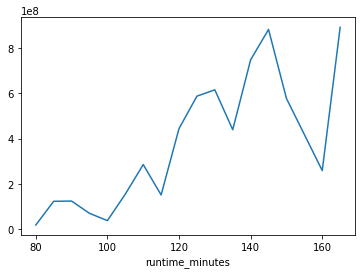

In [127]:
scifi_runtime_plot.groupby(['runtime_minutes'])['total_gross'].mean().plot();

In [128]:
# def a function to plot genre by average revenue over runtime minutes
def genre_gross_time_plot(genre, df):
    genre_drop_rows = []
    for row in df.index:
        if df[genre.capitalize()][row] == 0:
            genre_drop_rows.append(row)
            
    genre_plot = df.drop(genre_drop_rows)
    return (genre_plot.groupby(['runtime_minutes'])['total_gross'].mean(), 
            genre_plot.groupby(['runtime_minutes'])['total_gross'].mean().plot());

(runtime_minutes
 60.0     4.990000e+07
 80.0     6.382967e+07
 85.0     2.009186e+08
 90.0     2.283674e+08
 95.0     2.249872e+08
 100.0    2.613353e+08
 105.0    2.455996e+08
 110.0    2.036958e+08
 115.0    3.550379e+08
 120.0    2.927202e+08
 125.0    3.381840e+08
 130.0    5.922708e+08
 135.0    5.581400e+08
 140.0    7.493786e+08
 145.0    8.796573e+08
 150.0    5.009557e+08
 155.0    1.782993e+08
 160.0    3.492210e+08
 165.0    9.341667e+08
 Name: total_gross, dtype: float64,
 <AxesSubplot:xlabel='runtime_minutes'>)

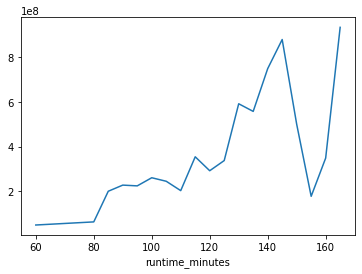

In [129]:
genre_gross_time_plot('adventure', bom_imdb)

(runtime_minutes
 60.0     4.990000e+07
 70.0     3.055000e+06
 75.0     1.916100e+06
 80.0     1.350000e+08
 85.0     2.215555e+08
 90.0     2.760704e+08
 95.0     3.448203e+08
 100.0    4.386921e+08
 105.0    4.981300e+08
 110.0    2.647350e+08
 115.0    4.242625e+08
 120.0    8.170000e+05
 Name: total_gross, dtype: float64,
 <AxesSubplot:xlabel='runtime_minutes'>)

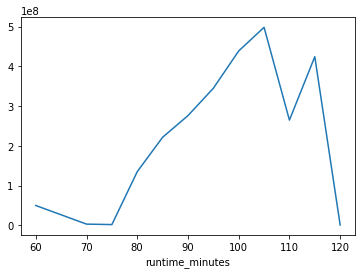

In [130]:
genre_gross_time_plot('animation', bom_imdb)

(runtime_minutes
 70.0     3.900000e+05
 80.0     5.479333e+06
 85.0     5.264990e+07
 90.0     6.353583e+07
 95.0     8.063195e+07
 100.0    8.198467e+07
 105.0    1.200900e+08
 110.0    1.714619e+08
 115.0    2.233414e+08
 120.0    3.577679e+08
 125.0    3.050040e+08
 130.0    4.271787e+08
 135.0    2.877113e+08
 140.0    7.314628e+08
 145.0    9.603000e+08
 150.0    7.380667e+08
 160.0    9.584000e+08
 165.0    1.021100e+09
 Name: total_gross, dtype: float64,
 <AxesSubplot:xlabel='runtime_minutes'>)

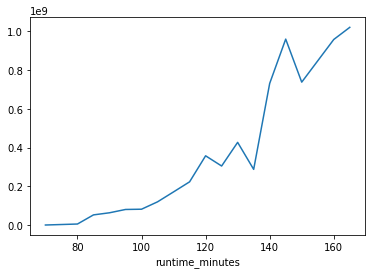

In [131]:
genre_gross_time_plot('fantasy', bom_imdb)

(runtime_minutes
 75.0     3.800000e+06
 80.0     4.134267e+07
 85.0     7.306688e+07
 90.0     8.612586e+07
 95.0     1.465068e+08
 100.0    1.282422e+08
 105.0    1.177240e+08
 110.0    1.455689e+08
 115.0    2.060293e+08
 120.0    2.151620e+08
 125.0    1.847785e+08
 130.0    3.500680e+08
 135.0    2.917108e+08
 140.0    3.506070e+08
 145.0    3.491165e+08
 150.0    2.827474e+08
 155.0    5.845390e+07
 160.0    2.476655e+08
 165.0    6.791000e+08
 170.0    7.695000e+07
 Name: total_gross, dtype: float64,
 <AxesSubplot:xlabel='runtime_minutes'>)

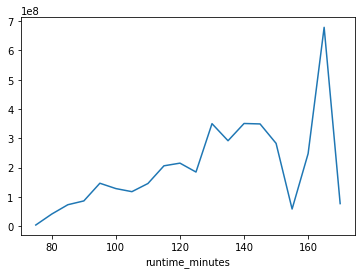

In [132]:
genre_gross_time_plot('action', bom_imdb)

In [136]:
# Viewing movie data in the 165-minute spike
bom_imdb.loc[bom_imdb['runtime_minutes'] == 165]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_year,index,title,studio,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
75,tt0816692,interstellar,Interstellar,2014,165.0,"Adventure,Drama,Sci-Fi",interstellar 2014,1486,interstellar,Par.,...,0,0,0,0,0,1,0,0,0,0
100,tt0903624,the hobbit an unexpected journey,The Hobbit: An Unexpected Journey,2012,165.0,"Adventure,Family,Fantasy",the hobbit an unexpected journey 2012,730,the hobbit an unexpected journey,WB (NL),...,0,0,0,0,0,0,0,0,0,0
154,tt1065073,boyhood,Boyhood,2014,165.0,Drama,boyhood 2014,1586,boyhood,IFC,...,0,0,0,0,0,0,0,0,0,0
199,tt1188996,my name is khan,My Name Is Khan,2010,165.0,Drama,my name is khan 2010,117,my name is khan,FoxS,...,0,0,0,0,0,0,0,0,0,0
779,tt1853728,django unchained,Django Unchained,2012,165.0,"Drama,Western",django unchained 2012,743,django unchained,Wein.,...,0,0,0,0,0,0,0,0,0,1
803,tt1891757,bol,Bol,2011,165.0,Drama,bol 2011,659,bol,Eros,...,0,0,0,0,0,0,0,0,0,0
933,tt2109248,transformers age of extinction,Transformers: Age of Extinction,2014,165.0,"Action,Adventure,Sci-Fi",transformers age of extinction 2014,1477,transformers age of extinction,Par.,...,0,0,0,0,0,1,0,0,0,0
1364,tt3460252,the hateful eight,The Hateful Eight,2015,165.0,"Crime,Drama,Mystery",the hateful eight 2015,1917,the hateful eight,Wein.,...,0,0,1,0,0,0,0,0,0,0
1629,tt4849438,baahubali 2 the conclusion,Baahubali 2: The Conclusion,2017,165.0,"Action,Drama",baahubali 2 the conclusion 2017,2796,baahubali 2 the conclusion,GrtIndia,...,0,0,0,0,0,0,0,0,0,0


In [135]:
bom_imdb.loc[bom_imdb['runtime_minutes'] == 165]['total_gross']

75      6.774000e+08
100     1.021100e+09
154     4.450000e+07
199     4.230000e+07
779     4.254000e+08
803     1.890000e+05
933     1.104000e+09
1364    1.557000e+08
1629    2.542000e+08
Name: total_gross, dtype: float64

The Hobbit and Transformers both made over $1 billion! It is worth looking at the individual movies within the 165-169 min group. However we will not be treating them as outliers 

In [138]:
# Viewing movie data in the 150-159 minute valley
bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 150) & (bom_imdb['runtime_minutes'] < 160)]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_year,index,title,studio,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
18,tt0443272,lincoln,Lincoln,2012,150.0,"Biography,Drama,History",lincoln 2012,757,lincoln,BV,...,0,0,0,0,0,0,0,0,0,0
31,tt0466893,margaret,Margaret,2011,150.0,Drama,margaret 2011,696,margaret,FoxS,...,0,0,0,0,0,0,0,0,0,0
137,tt1029231,krrish 3,Krrish 3,2013,150.0,"Action,Adventure,Sci-Fi",krrish 3 2013,1337,krrish 3,Eros,...,0,0,0,0,0,1,0,0,0,0
142,tt1034415,suspiria,Suspiria,2018,150.0,"Fantasy,Horror,Mystery",suspiria 2018,3236,suspiria,Amazon,...,0,0,1,0,0,0,0,0,0,0
220,tt1210819,the lone ranger,The Lone Ranger,2013,150.0,"Action,Adventure,Western",the lone ranger 2013,1157,the lone ranger,BV,...,0,0,0,0,0,0,0,0,0,1
356,tt1375789,race 2,Race 2,2013,150.0,"Action,Crime,Thriller",race 2 2013,1349,race 2,UTV,...,0,0,0,0,0,0,0,1,0,0
369,tt1392214,prisoners,Prisoners,2013,150.0,"Crime,Drama,Mystery",prisoners 2013,1187,prisoners,WB,...,0,0,1,0,0,0,0,0,0,0
371,tt1395025,agent vinod,Agent Vinod,2012,155.0,"Action,Adventure,Thriller",agent vinod 2012,1003,agent vinod,Eros,...,0,0,0,0,0,0,0,1,0,0
377,tt1399103,transformers dark of the moon,Transformers: Dark of the Moon,2011,150.0,"Action,Adventure,Sci-Fi",transformers dark of the moon 2011,329,transformers dark of the moon,P/DW,...,0,0,0,0,0,1,0,0,0,0
434,tt1455811,khatta meetha,Khatta Meetha,2010,155.0,"Comedy,Crime,Drama",khatta meetha 2010,240,khatta meetha,Eros,...,0,0,0,0,0,0,0,0,0,0


In [139]:
bom_imdb.loc[(bom_imdb['runtime_minutes'] >= 150) & (bom_imdb['runtime_minutes'] < 160)]['total_gross']

18      2.753000e+08
31      4.650000e+04
137     2.200000e+06
142     7.900000e+06
220     2.605000e+08
356     1.600000e+06
369     1.221000e+08
371     6.980000e+05
377     1.123800e+09
434     1.041000e+06
470     1.616000e+06
484     2.682000e+08
515     2.035000e+06
516     3.100000e+06
643     5.329000e+08
700     2.880000e+07
739     1.328000e+08
801     9.430000e+04
913     2.800000e+06
1017    2.600000e+06
1023    7.390000e+05
1032    1.520000e+05
1040    3.700000e+05
1071    2.710000e+05
1085    1.010000e+05
1146    2.220000e+07
1157    1.332600e+09
1182    6.700000e+06
1222    5.434000e+06
1241    4.200000e+07
1260    8.737000e+08
1305    1.400000e+06
1346    6.055000e+08
1353    2.360000e+05
1432    6.600000e+06
1458    3.250000e+05
1464    1.300000e+06
1483    8.800000e+04
1558    4.900000e+06
1563    2.840000e+07
1649    1.500000e+06
1662    3.900000e+06
1687    2.210000e+04
1709    2.700000e+06
1720    5.670000e+05
1780    2.400000e+06
1809    1.285900e+07
1826    7.150

#### Target Demographic
It seems there's a large swath of foreign films in this runtime group that have brought the average revenue down. We will not treat these films as outliers nor delete them. Instead it is important to take away that there are still some very high performing films in this time frame such as Transformers 1.1B, Star Wars 1.3B, Batman vs. Superman 874M. Additionally, this only confirms the 165-169 runtime group is not an outlier for this dataset!

What should this tell us about the demographic Microsoft should be targetting? If Microsoft wants to maximize their revenue, they should be targetting domestic rather than foreign audiences.

Insert graph from non-tech pres

### Q2 D. Data Evaluation

In [143]:
# Finding mean runtime for all movies
bom_imdb['runtime_minutes'].mean()

108.90428870292887

#### Runtime Recommendations
* Sci-Fi: 140-169 minutes
* Adventure: 140-169 minutes
* Animation: 100-119 minutes
* Fantasy: 140-164 minutes
* Action: 130-169 minutes

#### Longer Movies?
Though longer movies typically cost more to make, the data shows that if Microsoft wants to enter the movie industry at the top, they should be making blockbuster films with longer than average runtimes, as is the trend for many of these top revenue making films.

## Question 3: What movie personnel will maximize IMDB ratings?
Users of the popular movie website IMDB are able to rate movies they've viewed on a scale from 0-10. In this section we will explore which specific cast and crew personnel associate with higher scoring movies.

### Q3 A. Data Understanding
In this section we will be using four new datasets:

1. imdb.title.ratings - This dataset comes from IMDB. The 'Average Rating' variable will provide our success metric, while the 'Number of Votes' variable will help us weigh which average ratings to include and exclude. 
2. imdb_title_principals - This dataset comes from IMDB. It associates personnel with the movie they worked on, in addition to their role.
3. imdb_name_basics - This dataset comes from IM


In [73]:
imdb_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
imdb_title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [74]:
imdb_title_ratings['numvotes'].isna().sum()

0

In [75]:
# Finding mean number of votes
imdb_title_ratings['numvotes'].median()

49.0

In [76]:
imdb_title_ratings['numvotes'].max()

1841066

In [77]:
# Dropping movies less than 3,500 votes to weed out less popular movies
drop_fewer_votes = []
for row in imdb_title_ratings.index:
    if imdb_title_ratings['numvotes'][row] < 500000:
        drop_fewer_votes.append(row)
len(drop_fewer_votes)

73789

In [78]:
imdb_title_ratings.drop(drop_fewer_votes, inplace=True)
len(imdb_title_ratings)

67

In [81]:
imdb_title_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
imdb_title_principals

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [82]:
imdb_title_principals.duplicated(subset=['nconst']).sum()

423640

In [83]:
imdb_title_principals.duplicated().sum()

0

In [84]:
imdb_title_principals.isna().sum()

tconst             0
ordering           0
nconst             0
category           0
job           850502
characters    634826
dtype: int64

In [85]:
# getting a unique category list
unique_category_list = []
for category_details in imdb_title_principals['category']:
    unique_category_list.append(category_details)

unique_category_list = sorted(list(set(unique_category_list)))
unique_category_list

['actor',
 'actress',
 'archive_footage',
 'archive_sound',
 'cinematographer',
 'composer',
 'director',
 'editor',
 'producer',
 'production_designer',
 'self',
 'writer']

In [86]:
imdb_principals_ratings = pd.merge(
    imdb_title_principals,
    imdb_title_ratings,
    how='inner',
    on ='tconst')
imdb_principals_ratings

,tconst,ordering,nconst,category,job,characters,averagerating,numvotes
0,tt1228705,10,nm0456158,writer,Marvel comic book,NaN,7.0,657690
1,tt1228705,1,nm0000375,actor,NaN,"[""Tony Stark""]",7.0,657690
2,tt1228705,2,nm0000620,actor,NaN,"[""Ivan Vanko""]",7.0,657690
3,tt1228705,3,nm0000569,actress,NaN,"[""Pepper Potts""]",7.0,657690
4,tt1228705,4,nm0000332,actor,NaN,"[""Lt. Col. James 'Rhodey' Rhodes""]",7.0,657690
...,...,...,...,...,...,...,...,...
665,tt3315342,5,nm0003506,director,NaN,NaN,8.1,560270
666,tt3315342,6,nm0291082,writer,screenplay by,NaN,8.1,560270
667,tt3315342,7,nm0338169,writer,screenplay by,NaN,8.1,560270
668,tt3315342,8,nm0739661,writer,based on the character created by,NaN,8.1,560270


In [87]:
imdb_name_basics = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
imdb_name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [88]:
imdb_name_basics.duplicated().sum()

0

In [89]:
imdb_name_basics.isna().sum()

nconst                     0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

In [90]:
imdb_names_roles = pd.merge(
    imdb_name_basics,
    imdb_principals_ratings,
    how='inner',
    on ='nconst')
imdb_names_roles

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,tconst,ordering,category,job,characters,averagerating,numvotes
0,nm0125336,Jez Butterworth,1969.0,NaN,"writer,producer,actor","tt0977855,tt2379713,tt1355683,tt1631867",tt1631867,7,writer,screenplay by,NaN,7.9,546284
1,nm0570912,Adam McKay,1968.0,NaN,"producer,writer,director","tt6266538,tt1386588,tt0478970,tt1596363",tt0478970,8,writer,screenplay by,NaN,7.3,501213
2,nm0837112,Richard Suckle,NaN,NaN,"producer,actor,miscellaneous","tt0963178,tt0119099,tt0451279,tt1800241",tt1386697,8,producer,producer,NaN,6.0,533039
3,nm0913488,Kerry Washington,1977.0,NaN,"actress,producer,soundtrack","tt1837576,tt0455590,tt0206275,tt1853728",tt1853728,4,actress,NaN,"[""Broomhilda von Shaft""]",8.4,1211405
4,nm1014201,Rhett Reese,NaN,NaN,"writer,producer,miscellaneous","tt5442430,tt1156398,tt1583421,tt1431045",tt1431045,6,writer,written by,NaN,8.0,820847
...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,nm5037683,Andy Lanning,NaN,NaN,writer,"tt3896198,tt4176370,tt6791350,tt2015381",tt2015381,8,writer,based on the Marvel comics by,NaN,8.1,948394
666,nm5397459,Daisy Ridley,1992.0,NaN,"actress,producer,soundtrack","tt2488496,tt3402236,tt2076822,tt2527336",tt2488496,1,actress,NaN,"[""Rey""]",8.0,784780
667,nm5473782,Taron Egerton,1989.0,NaN,"actor,soundtrack","tt3470600,tt1083452,tt2802144,tt4649466",tt2802144,2,actor,NaN,"[""Gary 'Eggsy' Unwin""]",7.7,544510
668,nm5384213,Ted Chiang,1967.0,NaN,writer,"tt2543164,tt7593298,tt3785196,tt6591030",tt2543164,7,writer,"based on the story ""Story of Your Life"" writte...",NaN,7.9,515483


In [91]:
# creating and populating category columns
for category in unique_category_list:
    imdb_names_roles[category] = imdb_names_roles['category'].apply(lambda x: category in x).astype('int')
imdb_names_roles

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,tconst,ordering,category,job,...,archive_footage,archive_sound,cinematographer,composer,director,editor,producer,production_designer,self,writer
0,nm0125336,Jez Butterworth,1969.0,NaN,"writer,producer,actor","tt0977855,tt2379713,tt1355683,tt1631867",tt1631867,7,writer,screenplay by,...,0,0,0,0,0,0,0,0,0,1
1,nm0570912,Adam McKay,1968.0,NaN,"producer,writer,director","tt6266538,tt1386588,tt0478970,tt1596363",tt0478970,8,writer,screenplay by,...,0,0,0,0,0,0,0,0,0,1
2,nm0837112,Richard Suckle,NaN,NaN,"producer,actor,miscellaneous","tt0963178,tt0119099,tt0451279,tt1800241",tt1386697,8,producer,producer,...,0,0,0,0,0,0,1,0,0,0
3,nm0913488,Kerry Washington,1977.0,NaN,"actress,producer,soundtrack","tt1837576,tt0455590,tt0206275,tt1853728",tt1853728,4,actress,NaN,...,0,0,0,0,0,0,0,0,0,0
4,nm1014201,Rhett Reese,NaN,NaN,"writer,producer,miscellaneous","tt5442430,tt1156398,tt1583421,tt1431045",tt1431045,6,writer,written by,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,nm5037683,Andy Lanning,NaN,NaN,writer,"tt3896198,tt4176370,tt6791350,tt2015381",tt2015381,8,writer,based on the Marvel comics by,...,0,0,0,0,0,0,0,0,0,1
666,nm5397459,Daisy Ridley,1992.0,NaN,"actress,producer,soundtrack","tt2488496,tt3402236,tt2076822,tt2527336",tt2488496,1,actress,NaN,...,0,0,0,0,0,0,0,0,0,0
667,nm5473782,Taron Egerton,1989.0,NaN,"actor,soundtrack","tt3470600,tt1083452,tt2802144,tt4649466",tt2802144,2,actor,NaN,...,0,0,0,0,0,0,0,0,0,0
668,nm5384213,Ted Chiang,1967.0,NaN,writer,"tt2543164,tt7593298,tt3785196,tt6591030",tt2543164,7,writer,"based on the story ""Story of Your Life"" writte...",...,0,0,0,0,0,0,0,0,0,1


In [92]:
# Dropping deceased people
imdb_names_roles[imdb_names_roles['death_year'].isna() == False]

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,tconst,ordering,category,job,...,archive_footage,archive_sound,cinematographer,composer,director,editor,producer,production_designer,self,writer
6,nm0000341,Michael Crichton,1942.0,2008.0,"writer,producer,director","tt0070909,tt0117998,tt0108757,tt0107290",tt0369610,9,writer,based on the characters created by,...,0,0,0,0,0,0,0,0,0,1
8,nm0000450,Philip Seymour Hoffman,1967.0,2014.0,"actor,producer,soundtrack","tt1560747,tt0379725,tt0472062,tt0918927",tt1951264,4,actor,NaN,...,0,0,0,0,0,0,0,0,0,0
20,nm0959003,Stefan Zweig,1881.0,1942.0,writer,"tt0030418,tt8571542,tt2278388,tt7972350",tt2278388,6,writer,inspired by the writings of,...,0,0,0,0,0,0,0,0,0,1
78,nm0004170,Bob Kane,1915.0,1998.0,"writer,miscellaneous,art_department","tt0096895,tt0106364,tt0468569,tt0372784",tt1345836,8,writer,characters,...,0,0,0,0,0,0,0,0,0,1
79,nm0004170,Bob Kane,1915.0,1998.0,"writer,miscellaneous,art_department","tt0096895,tt0106364,tt0468569,tt0372784",tt2975590,8,writer,Batman created by,...,0,0,0,0,0,0,0,0,0,1
116,nm0456158,Jack Kirby,1917.0,1994.0,"writer,animation_department,miscellaneous","tt4154796,tt4154756,tt0371746,tt1825683",tt1228705,10,writer,Marvel comic book,...,0,0,0,0,0,0,0,0,0,1
117,nm0456158,Jack Kirby,1917.0,1994.0,"writer,animation_department,miscellaneous","tt4154796,tt4154756,tt0371746,tt1825683",tt1825683,8,writer,based on the Marvel Comics by,...,0,0,0,0,0,0,0,0,0,1
118,nm0456158,Jack Kirby,1917.0,1994.0,"writer,animation_department,miscellaneous","tt4154796,tt4154756,tt0371746,tt1825683",tt1843866,10,writer,based on the Marvel comics by,...,0,0,0,0,0,0,0,0,0,1
119,nm0456158,Jack Kirby,1917.0,1994.0,"writer,animation_department,miscellaneous","tt4154796,tt4154756,tt0371746,tt1825683",tt0458339,9,writer,comic books,...,0,0,0,0,0,0,0,0,0,1
120,nm0456158,Jack Kirby,1917.0,1994.0,"writer,animation_department,miscellaneous","tt4154796,tt4154756,tt0371746,tt1825683",tt1877832,9,writer,"based on Marvel's ""X-Men"" comics by",...,0,0,0,0,0,0,0,0,0,1


In [93]:
pd.isna(imdb_names_roles['death_year'][8])

False

In [94]:
pd.isna(imdb_names_roles['death_year'][9])

True

In [95]:
drop_deceased_rows = []
for row in imdb_names_roles.index:
    if pd.isna(imdb_names_roles['death_year'][row]) == False:
        drop_deceased_rows.append(row)
len(drop_deceased_rows)

50

In [96]:
imdb_names_roles.drop(drop_deceased_rows, inplace = True)
len(imdb_names_roles)

620

In [97]:
imdb_names_roles['known_for_titles'][0]

'tt0977855,tt2379713,tt1355683,tt1631867'

In [98]:
len(imdb_names_roles['known_for_titles'][0].split(","))

4

In [99]:
# Dropping null values in col 'known_for_titles'
imdb_names_roles['known_for_titles'].isna().sum()

0

In [100]:
drop_known_titles = []
for row in imdb_names_roles.index:
    if pd.isna(imdb_names_roles['known_for_titles'][row]):
        drop_known_titles.append(row)
len(drop_known_titles)

0

In [101]:
imdb_names_roles.drop(drop_known_titles, inplace = True)
len(imdb_names_roles)

620

In [102]:
# creating new col for number of known titles
known_titles_len = []
for title_details in imdb_names_roles['known_for_titles']:
    title_list = title_details.split(",")
    num_titles = len(title_list)
    known_titles_len.append(num_titles)
len(known_titles_len)

620

In [103]:
imdb_names_roles['known_titles_len'] = known_titles_len

In [104]:
drop_less_than_three = []
for row in imdb_names_roles.index:
    if imdb_names_roles['known_titles_len'][row] < 4:
        drop_less_than_three.append(row)
len(drop_less_than_three)

11

In [105]:
imdb_names_roles.drop(drop_less_than_three, inplace = True)
len(imdb_names_roles)

609

In [106]:
unique_category_list

['actor',
 'actress',
 'archive_footage',
 'archive_sound',
 'cinematographer',
 'composer',
 'director',
 'editor',
 'producer',
 'production_designer',
 'self',
 'writer']

In [107]:
# def a function to...
def category_top_rating(category, df):
    category_drop_rows = []
    for row in df.index:
        if df[category.lower()][row] == 0:
            category_drop_rows.append(row)
            
    category_cleaned = df.drop(category_drop_rows)
    return category_cleaned.groupby(['nconst'])['averagerating'].mean()

In [108]:
actor_top_ten = category_top_rating('actor', imdb_names_roles).sort_values(ascending=False).head(10)
actor_top_ten

nconst
nm0913822    8.8
nm0001663    8.5
nm0167388    8.5
nm1082477    8.5
nm1886602    8.5
nm0799777    8.5
nm0000288    8.4
nm0000198    8.4
nm0910607    8.4
nm0004937    8.4
Name: averagerating, dtype: float64

In [109]:
for row in imdb_names_roles.index:
    if imdb_names_roles['nconst'][row] == 'nm3591496':
        print(imdb_names_roles['primary_name'][row])

In [110]:
pd.DataFrame(actor_top_ten).reset_index()

,nconst,averagerating
0,nm0913822,8.8
1,nm0001663,8.5
2,nm0167388,8.5
3,nm1082477,8.5
4,nm1886602,8.5
5,nm0799777,8.5
6,nm0000288,8.4
7,nm0000198,8.4
8,nm0910607,8.4
9,nm0004937,8.4


In [116]:
def top_ten(series):
    ten = []
    person_rating = pd.DataFrame(series).reset_index()
    for index in person_rating.index:
        for row in imdb_names_roles.index:
            if imdb_names_roles['nconst'][row] == person_rating['nconst'][index]:
                ten.append(f"{imdb_names_roles['primary_name'][row]}: AVG rating of {person_rating['averagerating'][index]}")
    return ten

In [117]:
top_ten(actor_top_ten)

['Ken Watanabe: AVG rating of 8.8',
 'Paul Reiser: AVG rating of 8.5',
 'François Cluzet: AVG rating of 8.5',
 'Omar Sy: AVG rating of 8.5',
 'Miles Teller: AVG rating of 8.5',
 'J.K. Simmons: AVG rating of 8.5',
 'Christian Bale: AVG rating of 8.4',
 'Gary Oldman: AVG rating of 8.4',
 'Christoph Waltz: AVG rating of 8.4',
 'Jamie Foxx: AVG rating of 8.4']

In [118]:
actress_top_ten = category_top_rating('actress', imdb_names_roles).sort_values(ascending=False).head(10)
actress_top_ten

nconst
nm0680983    8.8
nm3237775    8.6
nm2552034    8.5
nm0004266    8.5
nm0494504    8.5
nm1109153    8.5
nm0913488    8.4
nm0000349    8.3
nm1567113    8.3
nm1411676    8.2
Name: averagerating, dtype: float64

In [119]:
top_ten(actress_top_ten)

['Ellen Page: AVG rating of 8.8',
 'Mackenzie Foy: AVG rating of 8.6',
 'Melissa Benoist: AVG rating of 8.5',
 'Anne Hathaway: AVG rating of 8.5',
 'Anne Hathaway: AVG rating of 8.5',
 'Anne Le Ny: AVG rating of 8.5',
 'Audrey Fleurot: AVG rating of 8.5',
 'Kerry Washington: AVG rating of 8.4',
 'Joan Cusack: AVG rating of 8.3',
 'Jessica Chastain: AVG rating of 8.3',
 'Jessica Chastain: AVG rating of 8.3',
 'Mindy Kaling: AVG rating of 8.2']

In [120]:
director_top_ten = category_top_rating('director', imdb_names_roles).sort_values(ascending=False).head(10)
director_top_ten
top_ten(director_top_ten)

['Christopher Nolan: AVG rating of 8.600000000000001',
 'Christopher Nolan: AVG rating of 8.600000000000001',
 'Christopher Nolan: AVG rating of 8.600000000000001',
 'Christopher Nolan: AVG rating of 8.600000000000001',
 'Damien Chazelle: AVG rating of 8.5',
 'Éric Toledano: AVG rating of 8.5',
 'Olivier Nakache: AVG rating of 8.5',
 'Quentin Tarantino: AVG rating of 8.4',
 'Lee Unkrich: AVG rating of 8.3',
 'Ronnie Del Carmen: AVG rating of 8.2',
 'Pete Docter: AVG rating of 8.2',
 'Martin Scorsese: AVG rating of 8.149999999999999',
 'Martin Scorsese: AVG rating of 8.149999999999999',
 'David Yates: AVG rating of 8.1']

In [122]:
writer_top_ten = category_top_rating('writer', imdb_names_roles).sort_values(ascending=False).head(10)
writer_top_ten
top_ten(writer_top_ten)

['Jonathan Nolan: AVG rating of 8.5',
 'Jonathan Nolan: AVG rating of 8.5',
 'Andrew Stanton: AVG rating of 8.3',
 'John Lasseter: AVG rating of 8.3',
 'Terence Winter: AVG rating of 8.2',
 'Jordan Belfort: AVG rating of 8.2',
 'Josh Cooley: AVG rating of 8.2',
 'Simon Rich: AVG rating of 8.2',
 'Meg LeFauve: AVG rating of 8.2',
 'Michael Green: AVG rating of 8.1',
 'Zak Penn: AVG rating of 8.1']

In [123]:
cinematographer_top_ten = category_top_rating('cinematographer', imdb_names_roles).sort_values(ascending=False).head(10)
cinematographer_top_ten
top_ten(cinematographer_top_ten)

['Wally Pfister: AVG rating of 8.8',
 'Hoyte Van Hoytema: AVG rating of 8.6',
 'Robert Richardson: AVG rating of 8.4',
 'Seamus McGarvey: AVG rating of 8.1',
 'Emmanuel Lubezki: AVG rating of 7.7',
 'Steve Yedlin: AVG rating of 7.4',
 'Roman Vasyanov: AVG rating of 6.0']

In [124]:
composer_top_ten = category_top_rating('composer', imdb_names_roles).sort_values(ascending=False).head(10)
composer_top_ten
top_ten(composer_top_ten)

['Hans Zimmer: AVG rating of 8.7',
 'Hans Zimmer: AVG rating of 8.7',
 'Justin Hurwitz: AVG rating of 8.5',
 'Randy Newman: AVG rating of 8.3',
 'Alan Silvestri: AVG rating of 8.1',
 'Junkie XL: AVG rating of 8.05',
 'Junkie XL: AVG rating of 8.05',
 'Alexandre Desplat: AVG rating of 7.933333333333333',
 'Alexandre Desplat: AVG rating of 7.933333333333333',
 'Alexandre Desplat: AVG rating of 7.933333333333333',
 'Mychael Danna: AVG rating of 7.9',
 'Danny Elfman: AVG rating of 7.7',
 'Kristen Anderson-Lopez: AVG rating of 7.5',
 'Nathan Johnson: AVG rating of 7.4']

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to clean the data

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***